In [1]:
import time
# Import the Qiskit modules(Qiskit Terra)
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QISKitError
from qiskit import QISKitError,execute, IBMQ, Aer
import numpy as np



# Set your API Token.
# You can get it from https://quantumexperience.ng.bluemix.net/qx/account,
# looking for "Personal Access Token" section.
QX_TOKEN = "3e30646ac6c9ac8bae7e1ab0802d14f67ed3667a6aa12e2328a46043dd8102f83de09858a41b43bd0c35f8e44eb6eb46ed27046ea61363354599d8f3a79bfa02"
QX_URL = "https://quantumexperience.ng.bluemix.net/api"

# Authenticate with the IBM Q API in order to use online devices.
# You need the API Token and the QX URL.
IBMQ.enable_account(QX_TOKEN, QX_URL)

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [2]:
"Choice of the backend"
# using local qasm simulator
backend = Aer.get_backend('qasm_simulator')  

# using IBMQ qasm simulator 
# backend = IBMQ.get_backend('ibmq_qasm_simulator')
# using real device
# backend = least_busy(IBMQ.backends(simulator=False))
# backend = IBMQ.get_backend('ibmq_16_melbourne')

flag_qx2 = True
if backend.name() == 'ibmqx4':
        flag_qx2 = False
        
print("Your choice for the backend is: ", backend, "flag_qx2 is: ", flag_qx2)

Your choice for the backend is:  qasm_simulator flag_qx2 is:  True


In [5]:
# Define a F_gate
def F_gate(circ,q,i,j,n,k) :
    theta = np.arccos(np.sqrt(1/(n-k+1)))
    circ.ry(-theta,q[j])       
    circ.cz(q[i],q[j])
    circ.ry(theta,q[j])
    circ.barrier(q[i])
# Define the cxrv gate which uses reverse CNOT instead of CNOT
def  cxrv(circ,q,i,j) :
    circ.h(q[i])
    circ.h(q[j])
    circ.cx(q[j],q[i])
    circ.h(q[i])
    circ.h(q[j])
    circ.barrier(q[i],q[j])

def wstategenrate(W_states) : 
# 3-qubit W state
     
    W_states.x(q[2]) #start is |100>
    F_gate(W_states,q,2,1,3,1) # Applying F12
    F_gate(W_states,q,1,0,3,2) # Applying F23

    # option ibmqx4  
    cxrv(W_states,q,1,2)
    cxrv(W_states,q,0,1)
    return W_states

start W state 3-qubit on qasm_simulator N= 8192 28/02/2019 07:25:56
end   W state 3-qubit on qasm_simulator N= 8192 28/02/2019 07:25:57


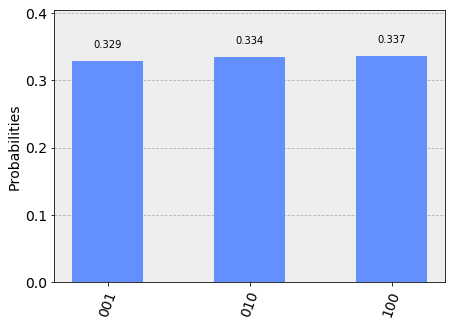

In [7]:
n = 3
q = QuantumRegister(n)
c = ClassicalRegister(n)
W_states = QuantumCircuit(q,c)
wstate = wstategenrate(W_states)

for i in range(3) :
    wstate.measure(q[i] , c[i]) 

shots = 8192
time_exp = time.strftime('%d/%m/%Y %H:%M:%S')
print('start W state 3-qubit on', backend, "N=", shots,time_exp)
result = execute(wstate, backend=backend, shots=shots)
time_exp = time.strftime('%d/%m/%Y %H:%M:%S')
print('end   W state 3-qubit on', backend, "N=", shots,time_exp)
plot_histogram(result.result().get_counts(W_states))

In [ ]:
W_states.draw(output="mpl")